**Boston Housing Price Prediction Model using Linear Regression**


**Project Implementation Details**: </br>
STEP 1  : Performed Exploratory Data Analysis(EDA) </br></br>
1.a  : Printed the number of missing values in dataset by using isnull().sum() method.</br>
1.b  : Printed the Total datapoints by using shape function 0th index which contains number of rows vaule.</br>
1.c  : Printed the first 5 rows of the data in dataset using the head() method.</br>
1.d  : Plotted all features of  with common values in  form of histogram using matplotlib.pyplot  library.</br>
1.e  : Plotted correlation of heatmap of features by using Seaborn and matplotlib libraries .</br></br>
STEP 2  : Builded a Linear Regression Model for House price Prediction</br></br>
2.a : Standardized the DataSet using the StandardScaller from Sklearn .</br>
2.b : Predicted The TargeT variable (MEDV) using the independent features by trainning on two trainning sets simultaneously.</br>
2.c : PLotted Actual Vs Predicted Home Prices by using matplotlib library.</br>
2.d  : Model deveoped by using Linear Regression Algorithm </br></br>
STEP 3  : Evaluated the Model by using various evaluation metrics to assess model’s performance</br></br>
Evaluation metric considered are : </br>
a. R² Score</br>
b. Mean Squared Error (MSE)</br>
c. Root MSE</br>
d. Mean Absolute Error (MAE)</br>
e. Mean Absolute Percentage Error (MAPE) </br>
These are calculated using the in-built functions from sklearn library.</br></br>
STEP 4 : Shown the Regression Coefficients of the Model </br>



In [ ]:
# Importing necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Setting display options to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
# Load Boston Housing dataset
print('Boston Housing Prices Prediction Model')
boston_housing_data = '/content/sample_data/BostonHousing.csv'
df_bh = pd.read_csv(boston_housing_data)

# Printing the total number of rows in the dataset using shape where the 0 index is stored with the total rows value
totalRows = df_bh.shape[0]
print("The total datapoints or Rows present in th egiven DataSet ",totalRows)

# Printing the names of the columns in the data set
print("Colums in the dataset : ")
columnInfo = {
'CRIM' : 'Per capita crime rate by town',
'ZN' : 'Proportion of residential land zoned for lots over 25,000 sq. ft',
'INDUS'  : 'Proportion of non-retail business acres per town',
'CHAS' :  'Charles River dummy variable (1 if tract bounds river; 0 otherwise)',
'NOX' : 'Nitric oxide concentration (parts per 10 million)',
'RM' : 'Average number of rooms per dwelling',
'AGE' : 'Proportion of owner-occupied units built before 1940',
'DIS' : 'Weighted distances to five Boston employment centres',
'RAD' : 'Index of accessibility to radial highways',
'TAX' : 'Full-value property tax rate per $10,000',
'PTRATIO' : 'Pupil-teacher ratio by town',
'B' : '1000(𝐵𝑘 − 0.63)2 where Bk is the proportion of Black residents by town',
'LSTAT' :  "Percentage of lower status of the population."

}

for column, des in columnInfo.items():
    print(f"{column : <10} {des}")

# Printing  first few rows using the head
print("First few rows of boston Housig Data ....")
print('Loading the data and displaying the first five rows...')
print(df_bh.head())

# 1. Data Preprocessing
# Checking for missing values and displaying only columns with missing values (without the dtype)
missingValues = df_bh.isnull().sum()
missingValues = missingValues[missingValues>0]
if len(missingValues)>0:
    print("Columns with missing values : ")
    print(missingValues.to_string(header = False))
else :
    print("NO Misiing values found in the given boston housing dataset")
print()
# Dropping rows with missing data (if necessary)
df_bh = df_bh.dropna()


Boston Housing Prices Prediction Model
The total datapoints or Rows present in th egiven DataSet  506
Colums in the dataset : 
CRIM       Per capita crime rate by town
ZN         Proportion of residential land zoned for lots over 25,000 sq. ft
INDUS      Proportion of non-retail business acres per town
CHAS       Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX        Nitric oxide concentration (parts per 10 million)
RM         Average number of rooms per dwelling
AGE        Proportion of owner-occupied units built before 1940
DIS        Weighted distances to five Boston employment centres
RAD        Index of accessibility to radial highways
TAX        Full-value property tax rate per $10,000
PTRATIO    Pupil-teacher ratio by town
B          1000(𝐵𝑘 − 0.63)2 where Bk is the proportion of Black residents by town
LSTAT      Percentage of lower status of the population.
First few rows of boston Housig Data ....
Loading the data and displaying the first five rows...


Plotting histograms of all independent columns/features...


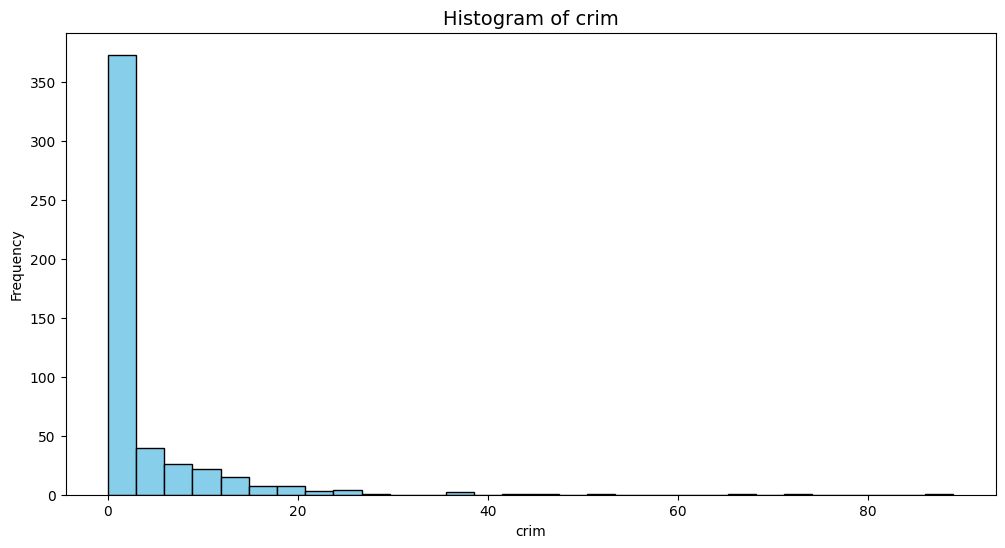

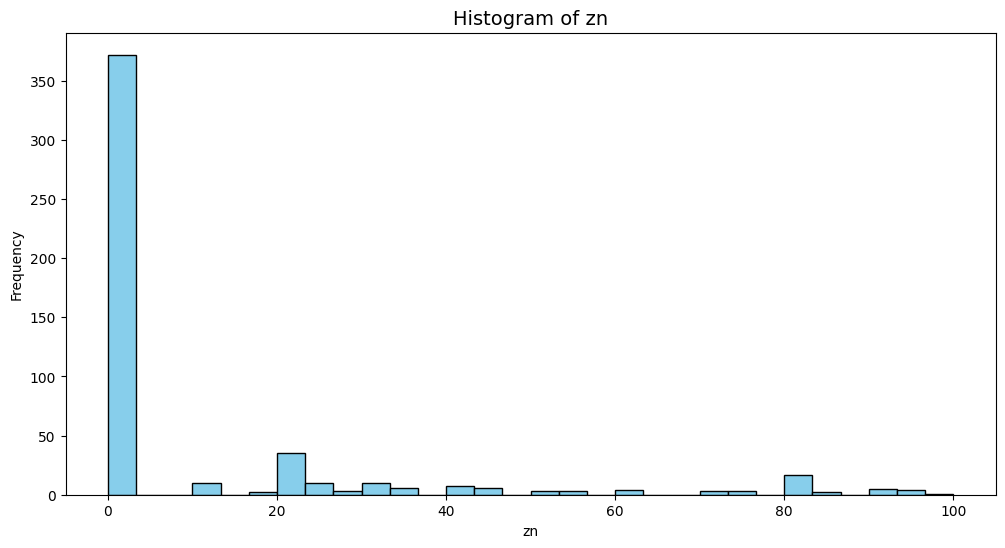

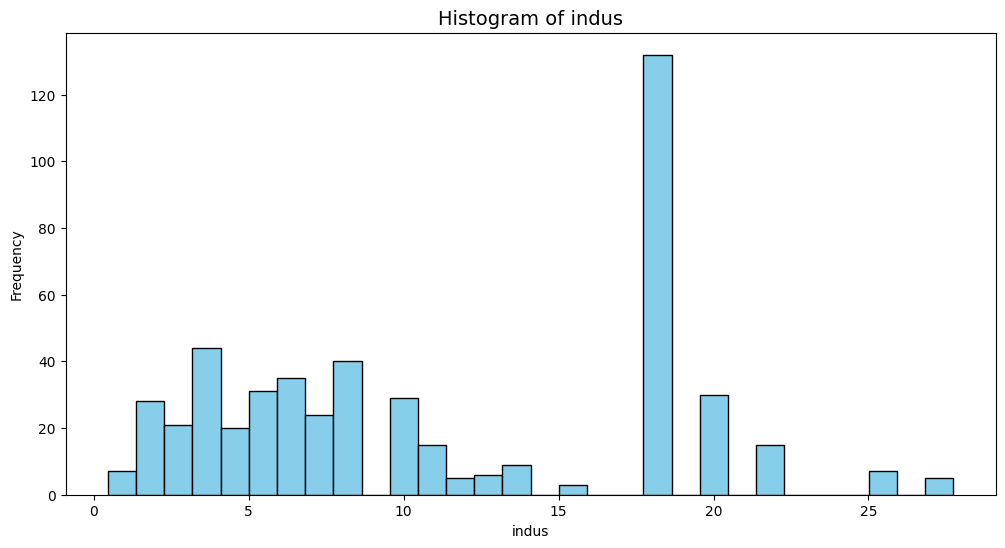

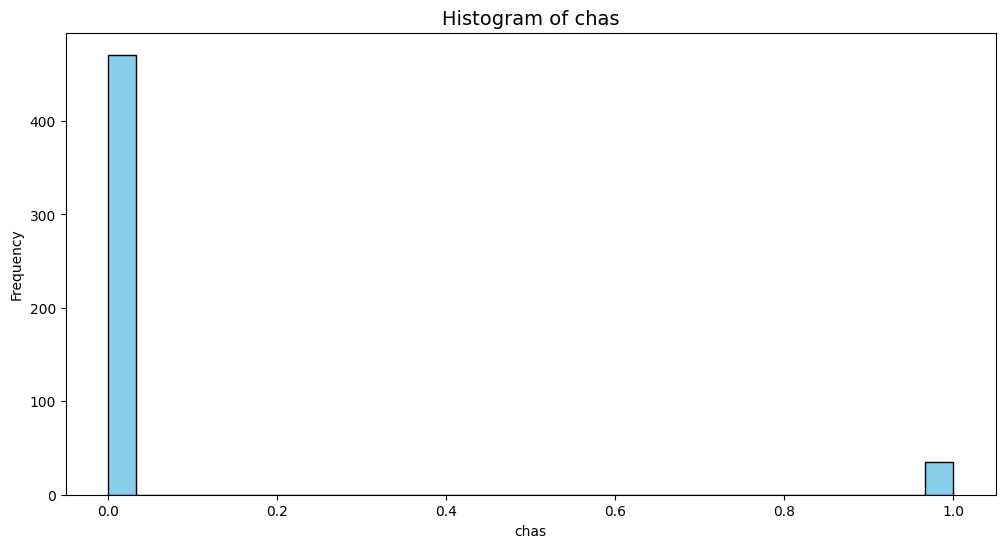

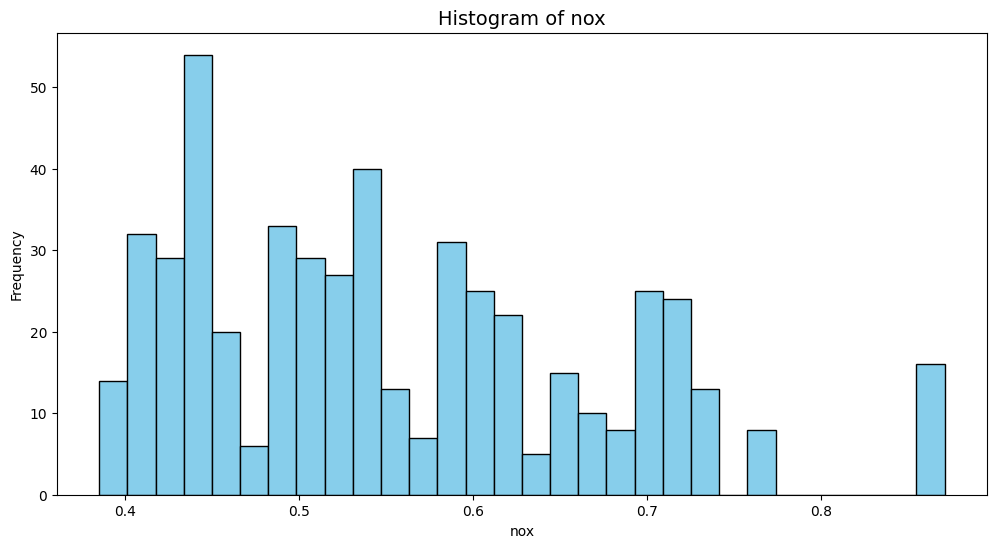

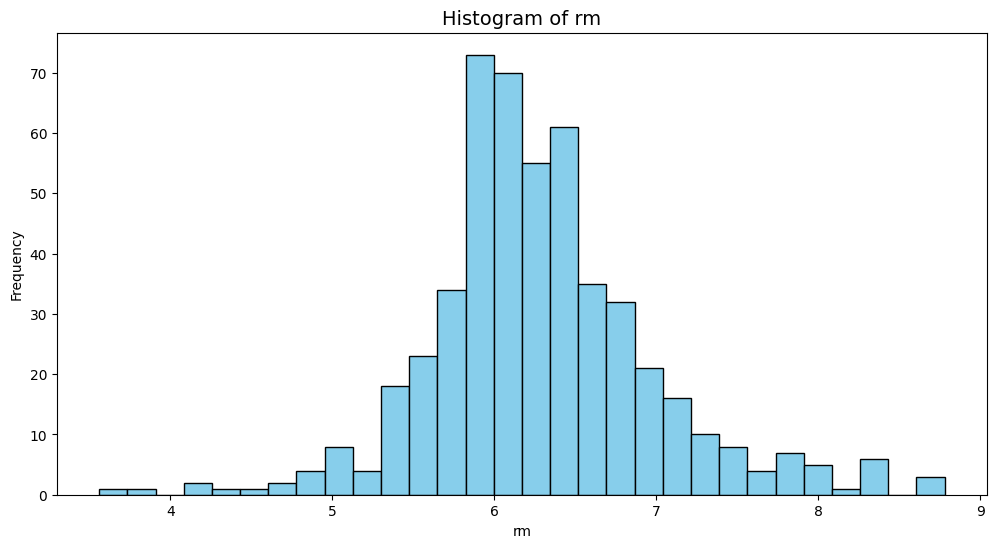

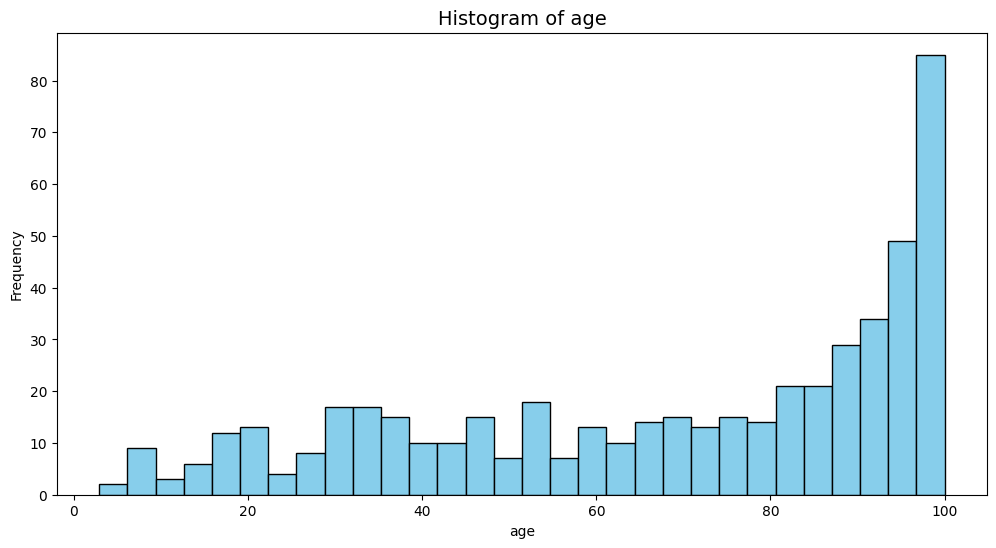

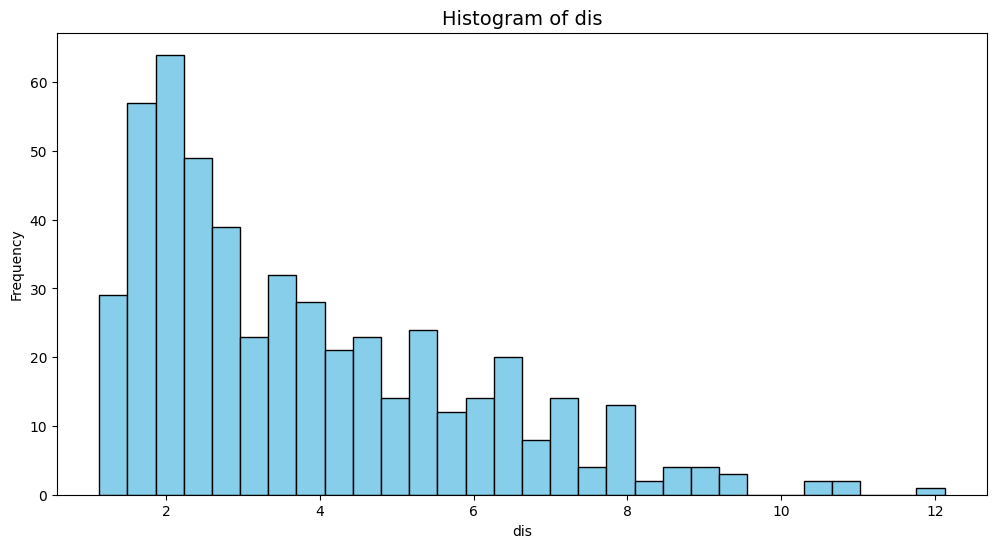

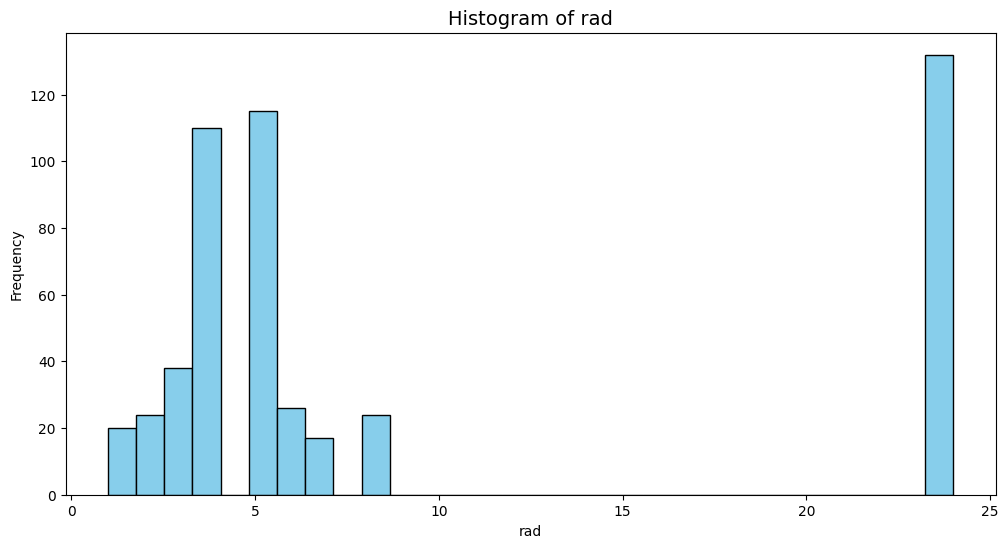

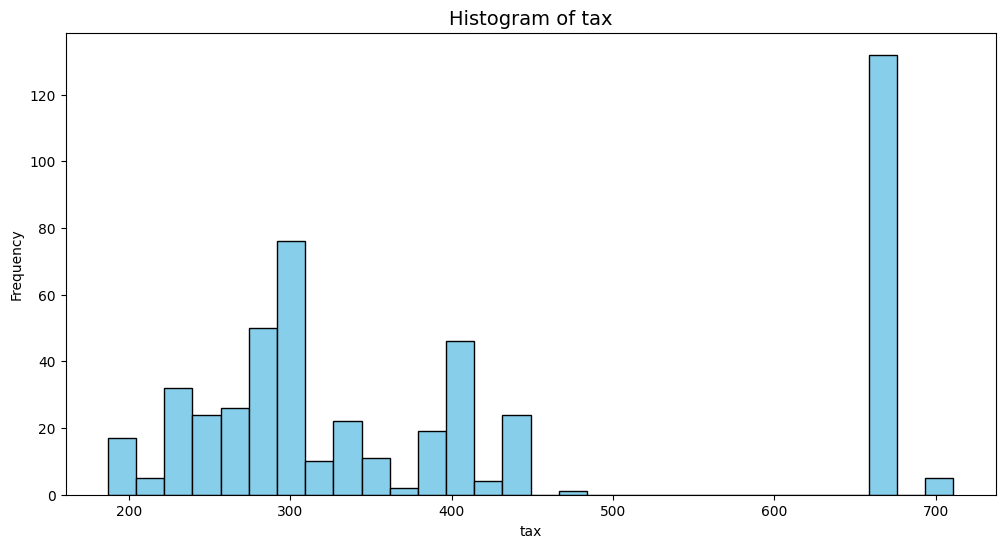

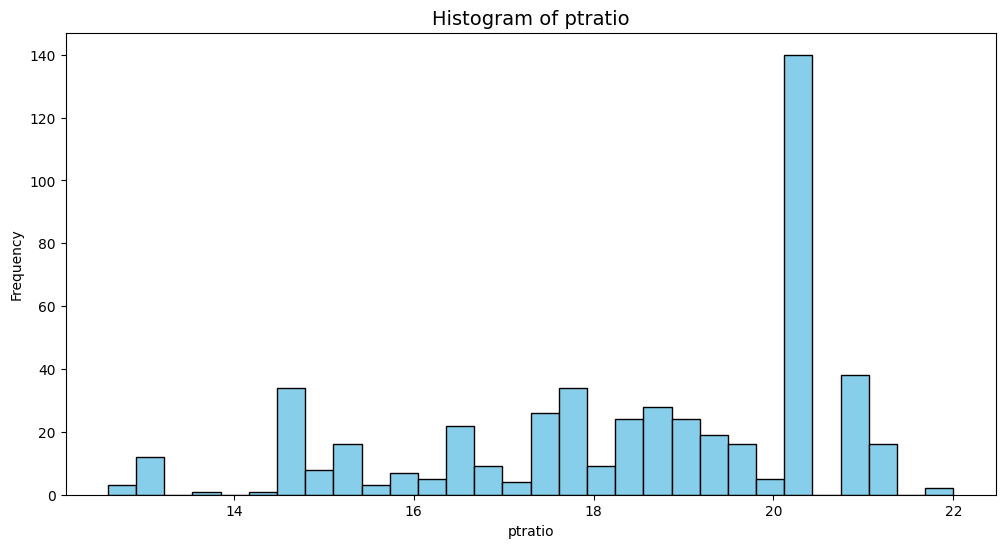

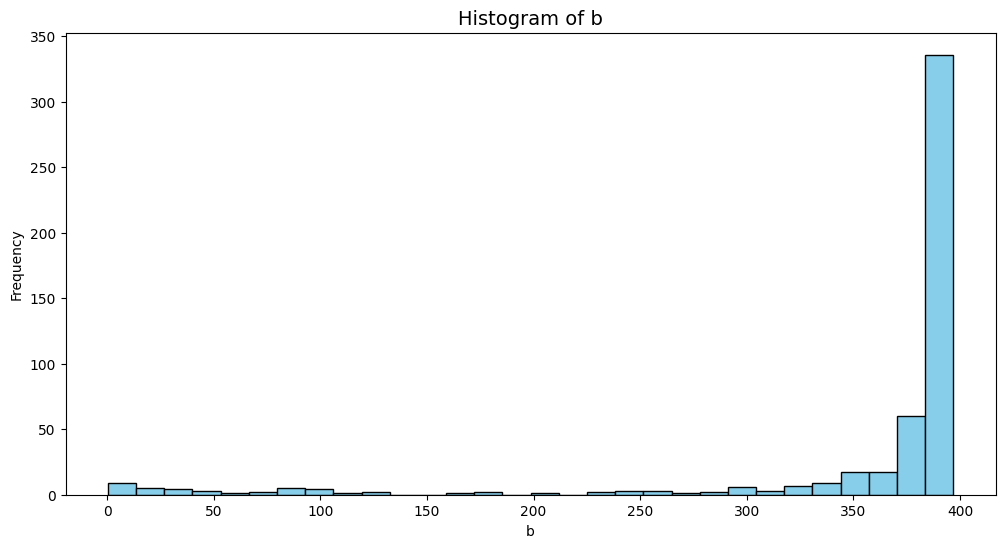

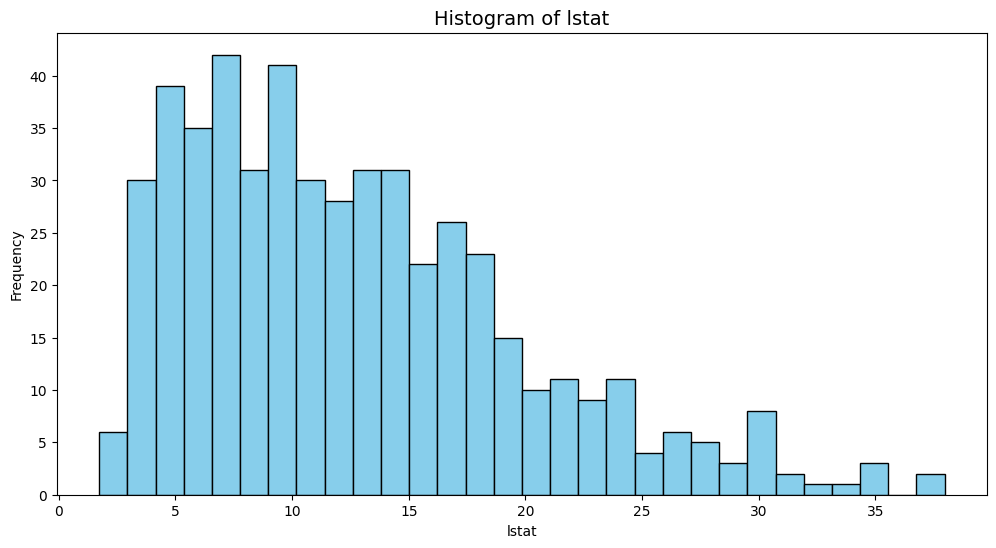

In [ ]:
# Exploratory data analysis

# Set figure size for all plots
figsize = (12, 6)
print('Plotting histograms of all independent columns/features...')

# Function to plot histograms of all independent columns
def plot_histograms_with_watermark(df, independent_columns):
    for col in independent_columns:
        fig, ax = plt.subplots(figsize=figsize)
        ax.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
        ax.set_title(f'Histogram of {col}', fontsize=14)
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        # Show the plot
        plt.show()

# Get the list of independent columns (excluding the target 'MEDV')
independentColumns = df_bh.columns[:-1]

# Plot the histograms with the watermark for all independent columns
plot_histograms_with_watermark(df_bh,independentColumns)

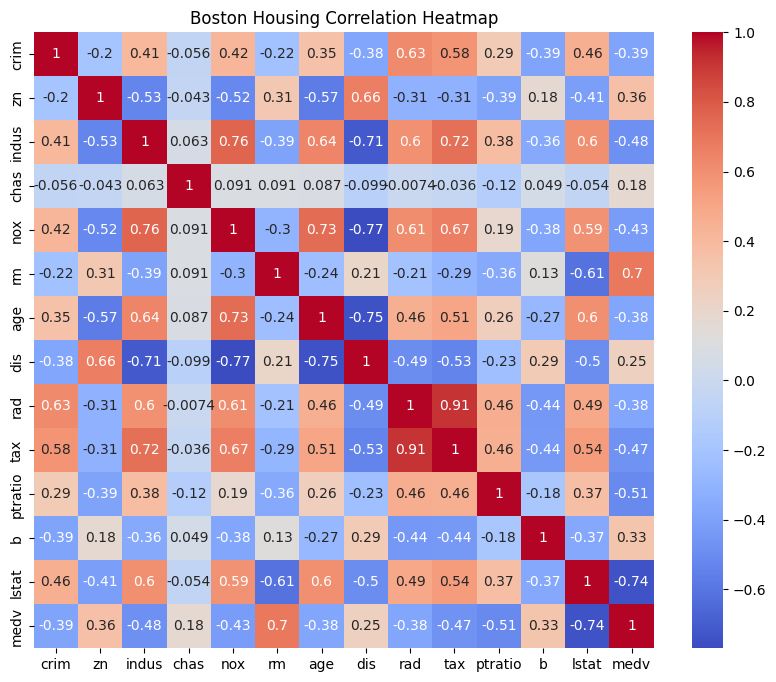

In [ ]:
# Plot correlation heatmap of features

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# df_bh contains your dataset
# Computing the correlation matrix using corr method
correlation_mat = df_bh.corr()

# Creating a figure of size 10x8 ratio
plt.figure(figsize=(10, 8))

# Plotting the heatmap
sns.heatmap(correlation_mat,annot = True,cmap='coolwarm')

# Setting the title
plt.title("Boston Housing Correlation Heatmap")
# Showing the plot
plt.show()

In [ ]:
# Train and build the linear regression model

# Selecting features (all columns except the last one, assuming it's the target)
x = df_bh.iloc[:, :-1]
# Selecting target (MEDV: Median value of owner-occupied homes in $1000s)
y = df_bh.iloc[:, -1]
# Standardizing the features using -"StandardScaler"
print('Standardising the data...')
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

# Spliting the data into training and testing sets
print('Splitting the data and training the model...')
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

# Build and train the Linear Regression model
model = LinearRegression()
model.fit(x_train,y_train)
# Make predictions on the test set
print('Predicting the test set...')
y_predict = model.predict(x_test)
print('Predicted the test set')

Standardising the data...
Splitting the data and training the model...
Predicting the test set...
Predicted the test set


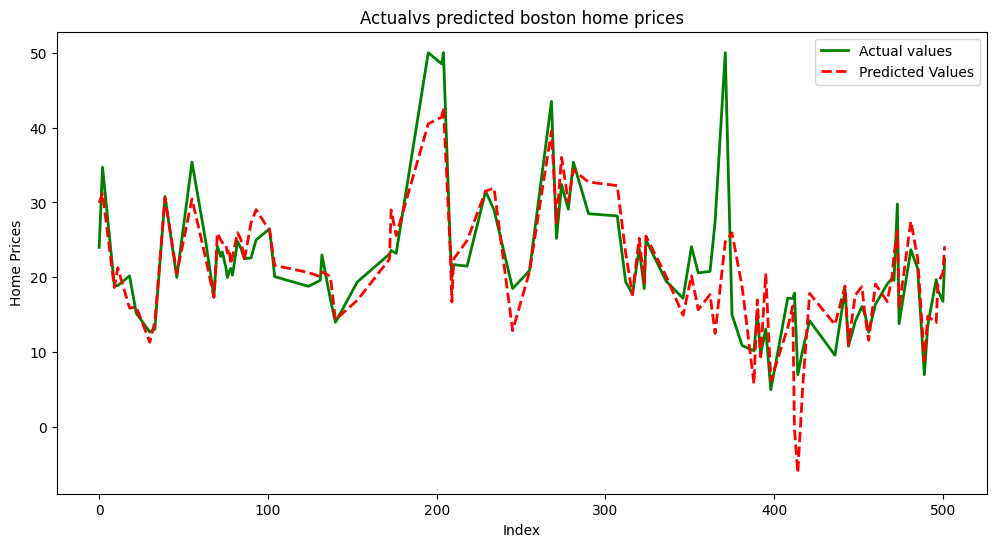

In [ ]:
# Plot Actual Vs Predicted Home Prices
# Sorted the actual and predicted values by index to make the lines smooth
yTestSorted = y_test.sort_index()
yPredictedSorted = pd.Series(y_predict,index = y_test.index).sort_index()

#Plotting  actualvs predicted values as smooth lines with green and red colors
plt.figure(figsize=(12,6))
plt.plot(yTestSorted,label = "Actual values",color = 'green',linewidth = 2)
plt.plot(yPredictedSorted,label = 'Predicted Values',color = 'red',linewidth = 2, linestyle='--')
plt.xlabel('Index')
plt.ylabel('Home Prices')
plt.title("Actualvs predicted boston home prices")
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Evaluate Model Performance

# Calculate R² Score
rSquare = r2_score(y_test,y_predict)
# Calculate Mean Squared Error (MSE)
MSE = mean_squared_error(y_test,y_predict)
# Calculate Root Mean Squared Error (RMSE)
RMSE = MSE** 0.5
# Calculate Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test,y_predict)
# Calculate Mean Absolute Percentage Error (MAPE)
MAPE = (abs((y_test-y_predict)/y_test)).mean()*100

# Print the results
print(f"R^2 score : {rSquare}")
print(f"Mean Squared Error (MSE) : {MSE}")
print(f"Root Mean Squared Error (RMSE) : {RMSE}")
print(f"Mean Absolute Error (MAE) : {MAE}")
print(f"Mean Absolute Percentage Error (MAPE) : {MAPE:.2f}%")



R^2 score : 0.668759493535632
Mean Squared Error (MSE) : 24.291119474973513
Root Mean Squared Error (RMSE) : 4.928602182665336
Mean Absolute Error (MAE) : 3.1890919658878487
Mean Absolute Percentage Error (MAPE) : 16.87%


In [ ]:
# Print coefficients of the linear model
coeffs = pd.DataFrame(model.coef_,x.columns,columns=['Coefficient'])
print('Regression Coefficients of the Model')
print(coeffs)


Regression Coefficients of the Model
         Coefficient
crim       -0.971494
zn          0.701556
indus       0.276752
chas        0.706532
nox        -1.991430
rm          3.115718
age        -0.177060
dis        -3.045771
rad         2.282785
tax        -1.792605
ptratio    -1.979954
b           1.126499
lstat      -3.628149
